### import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

### Load dataset

In [2]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= "unicode_escape")

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [4]:
df.shape

(11251, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


### Unique categories

In [6]:
for col in df.describe(include= 'object').columns:
    print(col)
    print(df[col].unique())
    print("-"*100)

Cust_name
['Sanskriti' 'Kartik' 'Bindu' ... 'Chris' 'Madan Mohan' 'Nicole']
----------------------------------------------------------------------------------------------------
Product_ID
['P00125942' 'P00110942' 'P00118542' ... 'P00307142' 'P00044742'
 'P00296942']
----------------------------------------------------------------------------------------------------
Gender
['F' 'M']
----------------------------------------------------------------------------------------------------
Age Group
['26-35' '0-17' '18-25' '55+' '46-50' '51-55' '36-45']
----------------------------------------------------------------------------------------------------
State
['Maharashtra' 'Andhra\xa0Pradesh' 'Uttar Pradesh' 'Karnataka' 'Gujarat'
 'Himachal Pradesh' 'Delhi' 'Madhya Pradesh' 'Jharkhand' 'Kerala'
 'Haryana' 'Bihar' 'Rajasthan' 'Uttarakhand' 'Telangana' 'Punjab']
----------------------------------------------------------------------------------------------------
Zone
['Western' 'Southern' 'Central

#### Check null values

In [7]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# drop null values
df.dropna(inplace=True)

### Rename columns

In [9]:
df.rename(columns= {'Marital_Status':'Marriedi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marriedi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


### Describe ( ststistics info ) on some columns

In [10]:
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Count of gender

C:\Users\PC\AppData\Local\Temp\ipykernel_14012\134163655.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gender = sns.countplot ( data = df , x = "Gender" , palette='pastel')


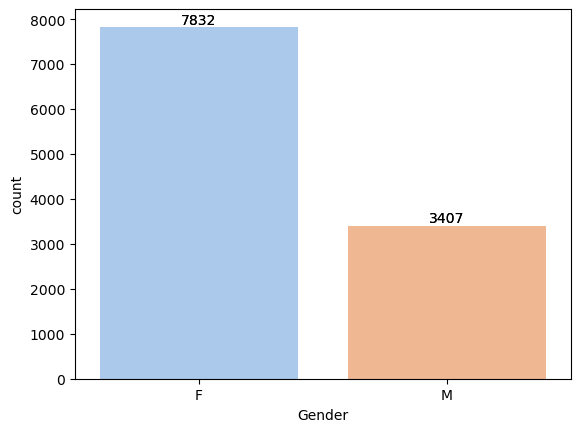

In [12]:
gender = sns.countplot ( data = df , x = "Gender" , palette='pastel')
for container in gender.containers:
    gender.bar_label(container)
plt.show()

#### gender vs total amount

C:\Users\PC\AppData\Local\Temp\ipykernel_14012\4034738210.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  data = sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen , palette='pastel')


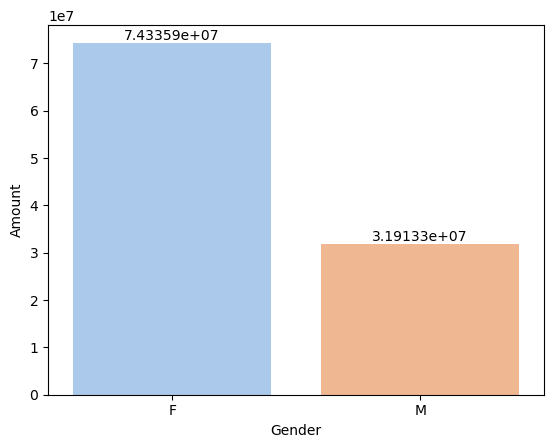

In [16]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
data = sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen , palette='pastel')
for container in data.containers:
    data.bar_label(container)
plt.show()

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Count of Age group

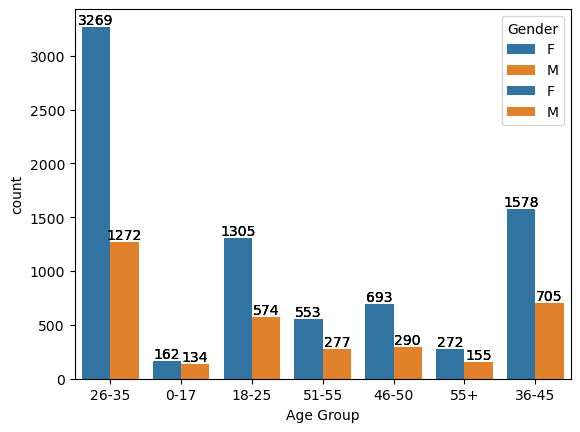

In [18]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

#### Total Amount vs Age Group

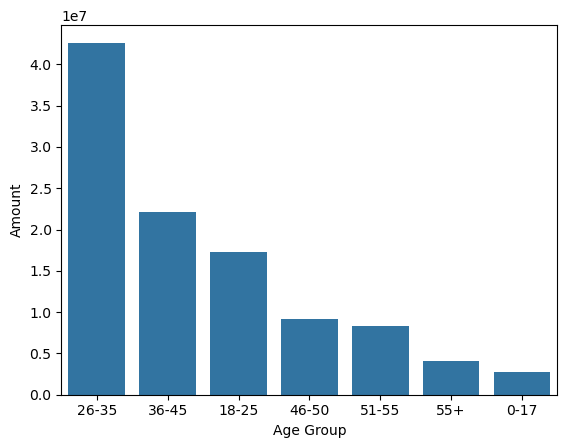

In [22]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax = sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

plt.show() 

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State VS Orders  (Top 10)

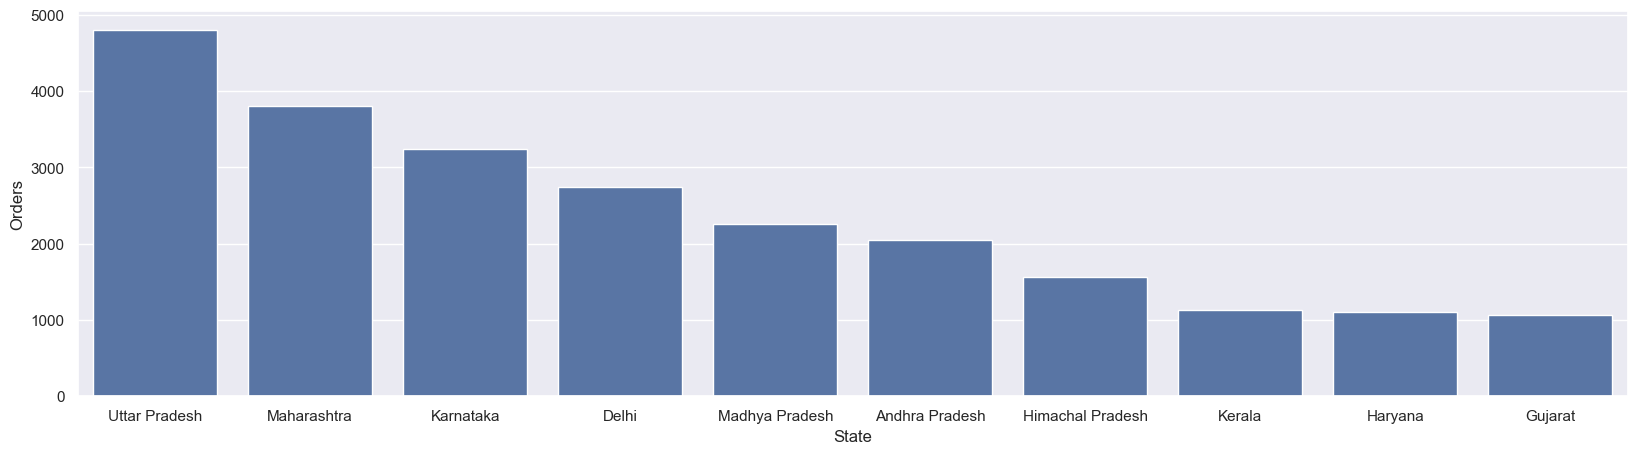

In [28]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.barplot(data = sales_state, x = 'State',y= 'Orders')
plt.show()

### State VS amount  (Top 10)

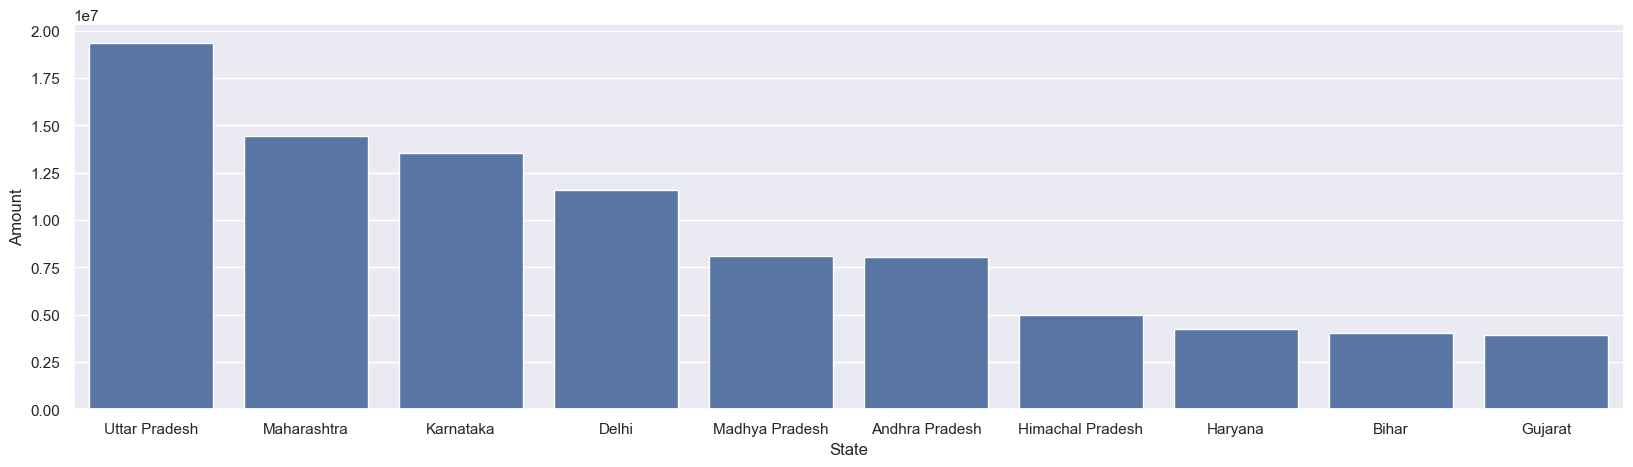

In [29]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(data = sales_state, x = 'State',y= 'Amount')
plt.show()

### Marital Status VS orders

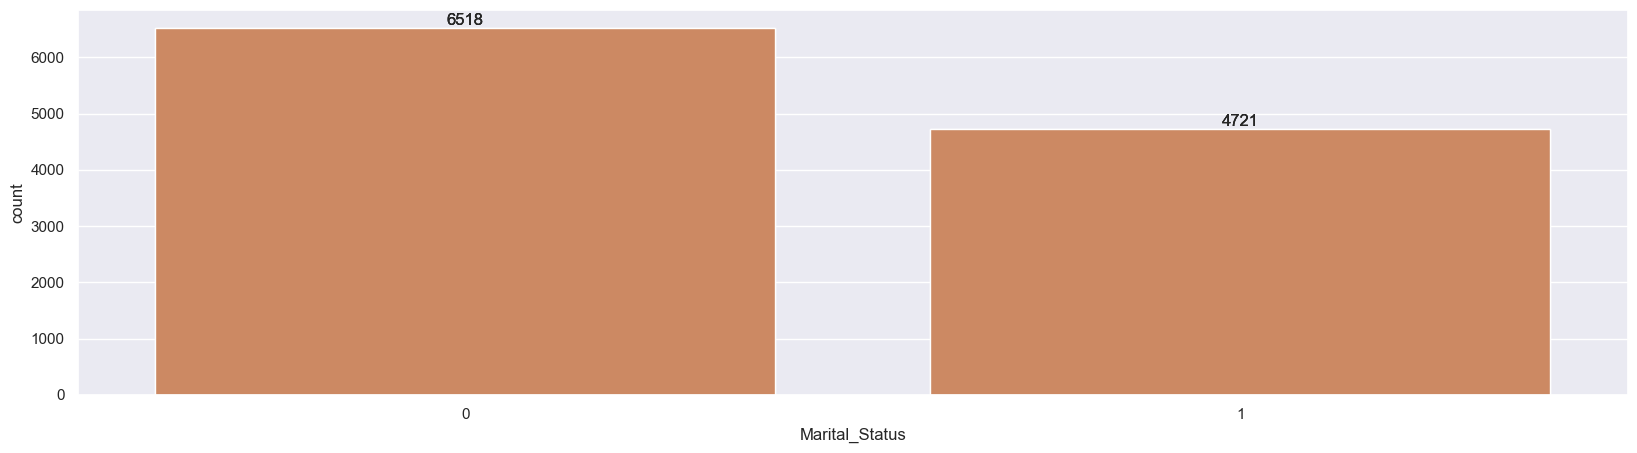

In [31]:
ax = sns.countplot(data = df, x = 'Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Marital Status VS amount (by genders)

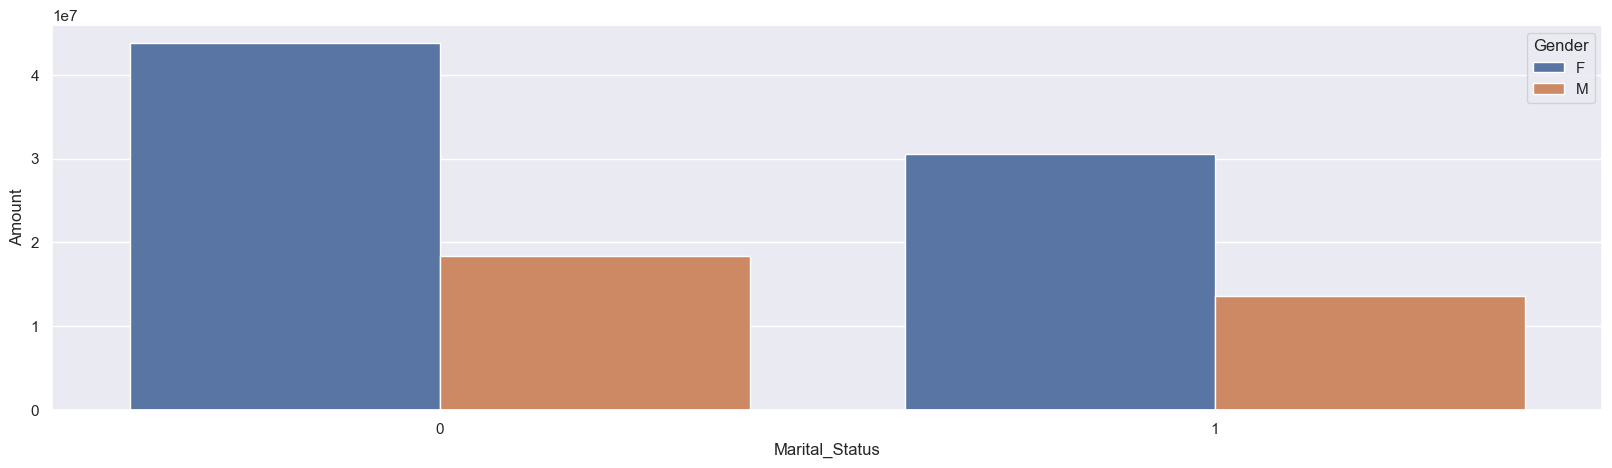

In [33]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

plt.show()

### Job field Vs amount

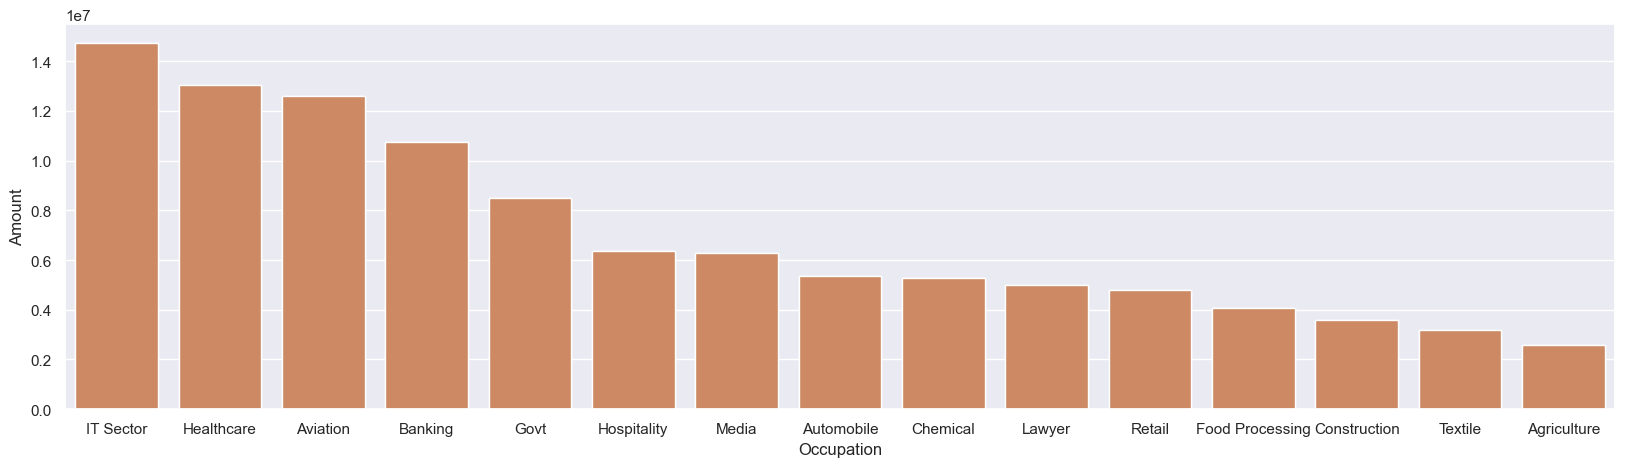

In [38]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
plt.show()

### Product Category Vs orders

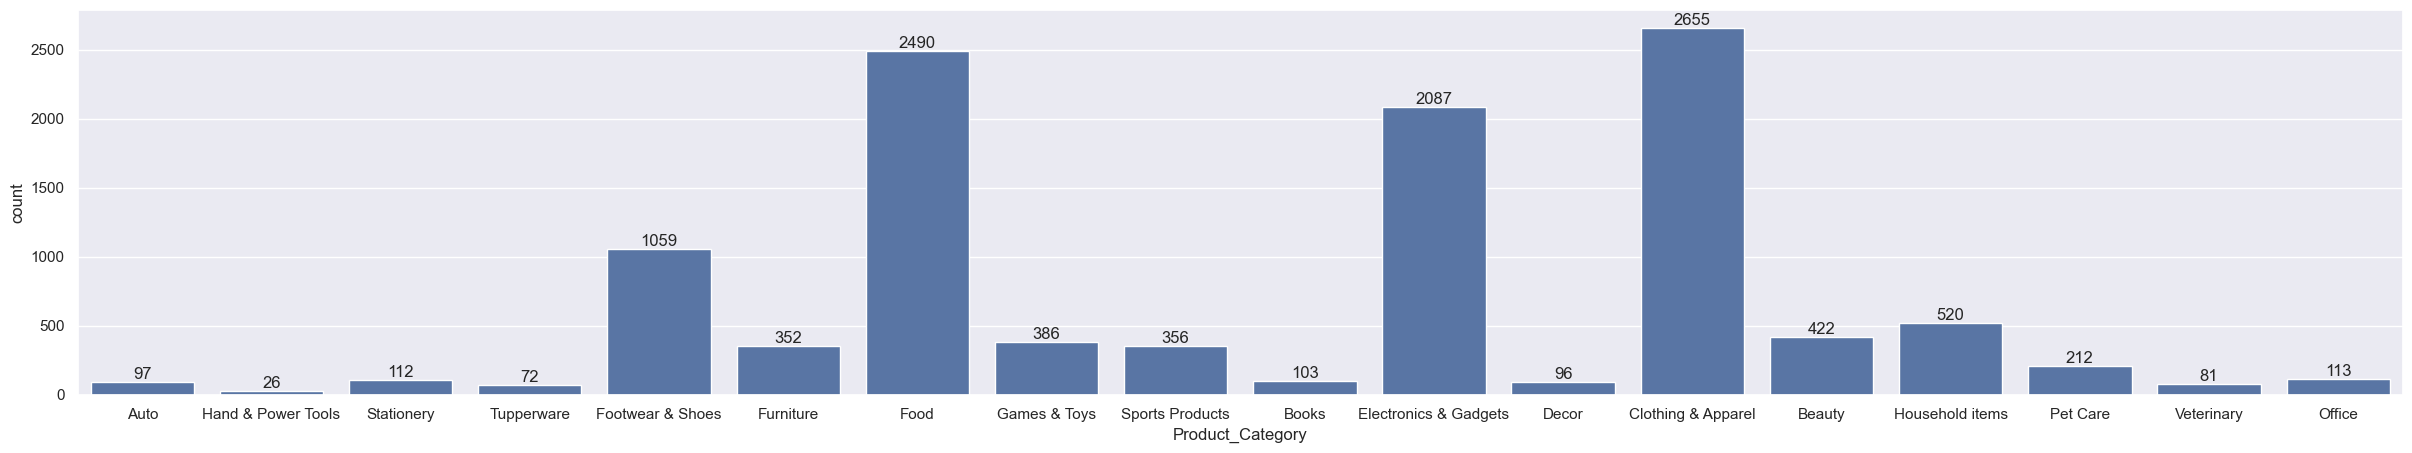

In [42]:
sns.set(rc={'figure.figsize':(30,5)})
ax = sns.countplot(data = df, x = 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Product Category Vs amount

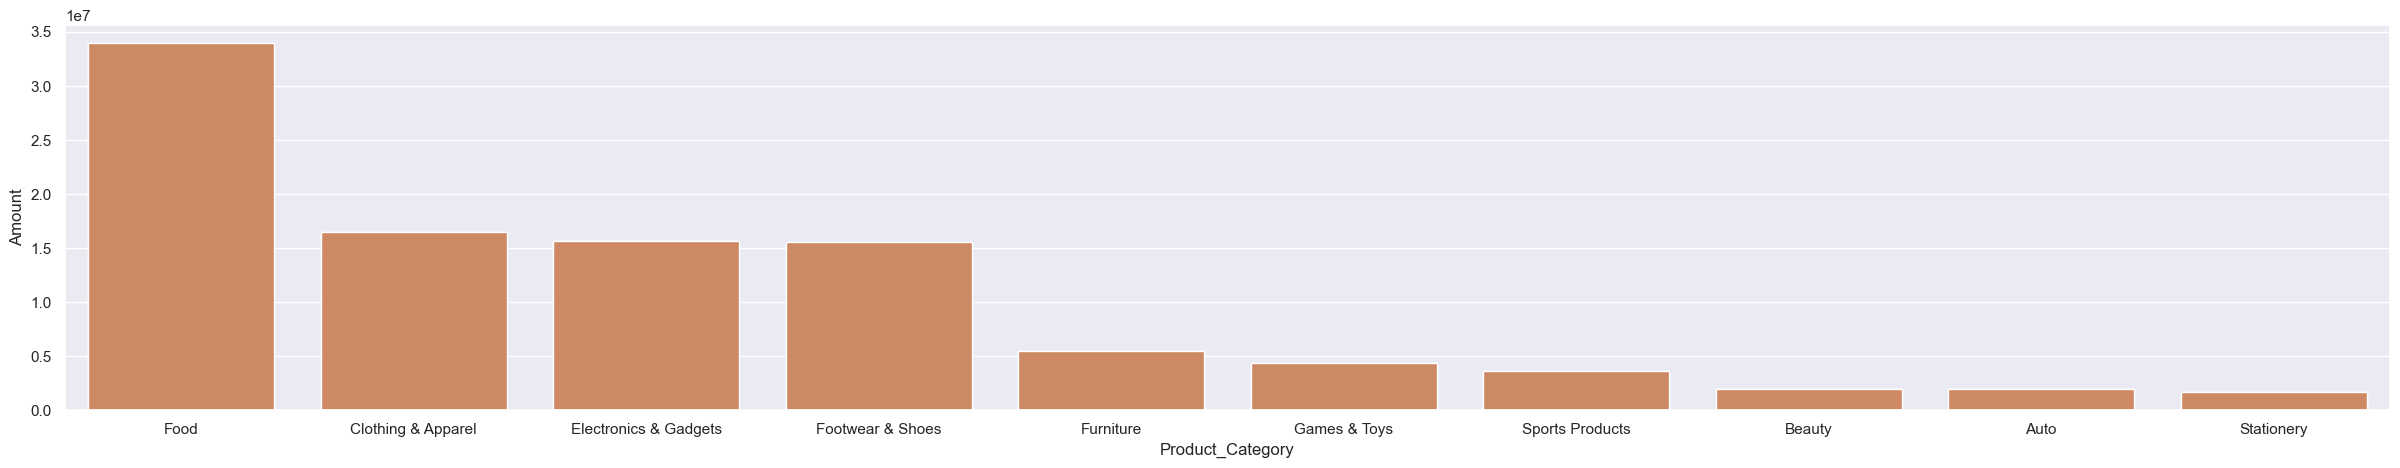

In [44]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')
plt.show()